# Zadatak 4: Implementacija regresije

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from zadatak4_linearna_regresija import LinReg

### Učitavanje podataka

In [2]:
df = pd.read_csv('./db/scrapy_vozila_20220602.csv', sep=';', names=['url', 'naslov', 'cena', 'stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga', 'menjac', 'vrata', 'boja', 'lokacija_prodavca'])

df

,url,naslov,cena,stanje,marka,model,godiste,kilometraza,karoserija,gorivo,kubikaza,snaga,menjac,vrata,boja,lokacija_prodavca
0,https://www.polovniautomobili.com/auto-oglasi/...,Fiat 500 14 16v SPORT CH,4599,Polovno vozilo,Fiat,500,2008,150661,Hečbek,Benzin,1400,74/101 (kW/KS),Manuelni 6 brzina,2/3 vrata,Siva,Vidikovac
1,https://www.polovniautomobili.com/auto-oglasi/...,Peugeot 508 2.0,8950,Polovno vozilo,Peugeot,508,2015,187000,Karavan,Dizel,1997,120/163 (kW/KS),Automatski / poluautomatski,4/5 vrata,Siva,Vidikovac
2,https://www.polovniautomobili.com/auto-oglasi/...,Hyundai Tucson 2.0 CRDI 4WD,4600,Polovno vozilo,Hyundai,Tucson,2006,231000,Džip/SUV,Dizel,1998,82/111 (kW/KS),Manuelni 5 brzina,4/5 vrata,Zlatna,Vidikovac
3,https://www.polovniautomobili.com/auto-oglasi/...,Volkswagen Golf 7 GTD,17000,Polovno vozilo,Volkswagen,Golf 7,2016,122000,Hečbek,Dizel,1968,135/184 (kW/KS),Manuelni 6 brzina,4/5 vrata,Crna,Vidikovac
4,https://www.polovniautomobili.com/auto-oglasi/...,Opel Antara 2.0 CDTI 4WD COSMO,5600,Polovno vozilo,Opel,Antara,2007,204000,Džip/SUV,Dizel,1991,110/150 (kW/KS),Manuelni 5 brzina,4/5 vrata,Crna,Vidikovac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,https://www.polovniautomobili.com/auto-oglasi/...,Toyota Avensis,2800,Polovno vozilo,Toyota,Avensis,2004,288000,Limuzina,Dizel,1995,85/116 (kW/KS),Manuelni 5 brzina,4/5 vrata,Zlatna,Niš
31652,https://www.polovniautomobili.com/auto-oglasi/...,Honda Civic 1.8 GT,8000,Polovno vozilo,Honda,Civic,2010,205000,Hečbek,Benzin,1799,103/140 (kW/KS),Manuelni 6 brzina,4/5 vrata,Crna,Niš
31653,https://www.polovniautomobili.com/auto-oglasi/...,Volkswagen Golf 5 1.9tdi 9,4450,Polovno vozilo,Volkswagen,Golf 5,2007,346567,Hečbek,Dizel,1896,77/105 (kW/KS),Manuelni 6 brzina,4/5 vrata,Teget,Niš
31654,https://www.polovniautomobili.com/auto-oglasi/...,Mercedes Benz A 180 A 180 cdi DCT,14800,Polovno vozilo,Mercedes Benz,A 180,2013,153000,Hečbek,Dizel,1796,80/109 (kW/KS),Automatski / poluautomatski,4/5 vrata,Siva,Niš


In [3]:
df.describe()

,godiste,kilometraza,kubikaza
count,31656.000000,3.165600e+04,3.165600e+04
mean,2008.603424,1.964099e+05,1.913877e+03
std,6.244448,1.391005e+05,1.142665e+04
min,1938.000000,0.000000e+00,1.000000e+02
25%,2005.000000,1.600000e+05,1.461000e+03
50%,2008.000000,1.900000e+05,1.750000e+03
75%,2012.000000,2.290000e+05,1.989000e+03
max,2022.000000,4.000000e+06,1.598590e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31656 entries, 0 to 31655
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                31656 non-null  object
 1   naslov             31656 non-null  object
 2   cena               31656 non-null  object
 3   stanje             31656 non-null  object
 4   marka              31656 non-null  object
 5   model              31656 non-null  object
 6   godiste            31656 non-null  int64 
 7   kilometraza        31656 non-null  int64 
 8   karoserija         31656 non-null  object
 9   gorivo             31656 non-null  object
 10  kubikaza           31656 non-null  int64 
 11  snaga              31656 non-null  object
 12  menjac             31656 non-null  object
 13  vrata              31656 non-null  object
 14  boja               31656 non-null  object
 15  lokacija_prodavca  31656 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.

In [5]:
df.dtypes

url                  object
naslov               object
cena                 object
stanje               object
marka                object
model                object
godiste               int64
kilometraza           int64
karoserija           object
gorivo               object
kubikaza              int64
snaga                object
menjac               object
vrata                object
boja                 object
lokacija_prodavca    object
dtype: object

### Uklanjanje nenumeričkih vrednosti cena i snage

In [6]:
# Cena
df = df.loc[pd.to_numeric(df['cena'], errors='coerce').notnull()]
df.loc[:, 'cena'] = df.loc[:, 'cena'].astype('int64')


# Snaga - zadrzava se brojka u konjskim snagama
def sredi_snagu(snaga: str) -> str:
    try:
        return re.search('(?<=/)\d+', snaga).group(0)
    except AttributeError:
        return None

df['snaga'] = df['snaga'].apply(sredi_snagu)

df = df.loc[pd.to_numeric(df['snaga'], errors='coerce').notnull()]
df.loc[:, 'snaga'] = df.loc[:, 'snaga'].astype('int64')

C:\Users\kifla\AppData\Local\Temp\ipykernel_5068\735780608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cena'] = df.loc[:, 'cena'].astype('int64')
C:\Users\kifla\AppData\Local\Temp\ipykernel_5068\735780608.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snaga'] = df['snaga'].apply(sredi_snagu)


In [7]:
df.dtypes

url                  object
naslov               object
cena                  int64
stanje               object
marka                object
model                object
godiste               int64
kilometraza           int64
karoserija           object
gorivo               object
kubikaza              int64
snaga                 int64
menjac               object
vrata                object
boja                 object
lokacija_prodavca    object
dtype: object

In [8]:
df.shape

(30487, 16)

### Odabir relevantnih podataka i pretvaranje kategoričkih vrednosti u numeričke

In [9]:
df_for_training = df.copy()

features_to_exclude = ['cena', 'url', 'naslov', 'marka', 'model', 'karoserija', 'gorivo', 'menjac', 'vrata', 'boja', 'lokacija_prodavca']
df_for_training = df_for_training.drop(features_to_exclude, axis=1)

categorical_features = ['stanje']
for f in categorical_features:
    df_for_training[f] = df_for_training[f].astype('category').cat.codes

### Skaliranje numeričkih podataka

In [10]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# numeric_features = ['godiste', 'kilometraza', 'kubikaza', 'snaga']
# scaler.fit(df_for_training[numeric_features])
# scaled_features = scaler.transform(df_for_training[numeric_features])
# for i in range(len(numeric_features)):
#     df_for_training[numeric_features[i]] = scaled_features[:, i]

# df_for_training



# numeric_features = ['godiste', 'kilometraza', 'kubikaza', 'snaga']
# for i in range(len(numeric_features)):
#     df_for_training[numeric_features[i]] = np.log(df_for_training[numeric_features[i]] + 1)

# df_for_training

,stanje,godiste,kilometraza,kubikaza,snaga
0,1,-0.089751,-0.343189,-0.044211,-0.440034
1,1,1.060758,-0.077278,0.007066,0.758765
2,1,-0.418468,0.244693,0.007152,-0.246679
3,1,1.225117,-0.552917,0.004575,1.164810
4,1,-0.254110,0.047120,0.006551,0.507404
...,...,...,...,...,...
31651,1,-0.747185,0.661791,0.006894,-0.150002
31652,1,0.238966,0.054437,-0.009940,0.314049
31653,1,-0.254110,1.090356,-0.001609,-0.362692
31654,1,0.732041,-0.326074,-0.010198,-0.285350


## Linearna regresija - priprema/konfigurisanje

### Podela podataka

In [11]:
DATA_COUNT = df.shape[0]    # U slucaju da treba manje podataka zbog performansi, koristiti samo deo celokupnog broja podataka

xtrain, xtest, ytrain, ytest = train_test_split(df_for_training[:DATA_COUNT], df['cena'][:DATA_COUNT], test_size=0.30, random_state=183)

### Funkcija za treniranje i primenu linearne regresije

In [12]:
def train_and_predict(linear_regression_cls, xtrain, xtest, ytrain, ytest, output: bool = True):
    lr = linear_regression_cls()
    lr.fit(xtrain, ytrain)
    ypred = lr.predict(xtest)
    
    if output:
        # print(f"Coefficients: {lr.coef_}")
        
        plt.figure(figsize = (18, 8))
        plt.scatter(ytest, ypred)
        plt.xlabel('Y Test')
        plt.ylabel('Y Predicted')
        print()
        
        print('MAE:', metrics.mean_absolute_error(ytest, ypred))
        print('MSE:', metrics.mean_squared_error(ytest, ypred))
        print('RMSE:', math.sqrt(metrics.mean_squared_error(ytest, ypred)))
        print()
        
        plt.figure(figsize = (18, 8))
        sns.set_palette("GnBu_d")
        sns.set_style('whitegrid')
        sns.distplot((ytest - ypred), bins=50)
        print()
        
        coeffecients = pd.DataFrame(lr.coef_, xtrain.columns)
        coeffecients.columns = ['Coeffecient']
        print(coeffecients)
        print()
        
    return ypred

## Linearna regresija - korišćenjem bibliotečke implementacije


MAE: 4180.347454996558
MSE: 63410137.893245555
RMSE: 7963.048278972416


             Coeffecient
stanje      -9556.010659
godiste      4192.296723
kilometraza -1316.314158
kubikaza        5.457514
snaga        6683.716873



c:\Users\kifla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


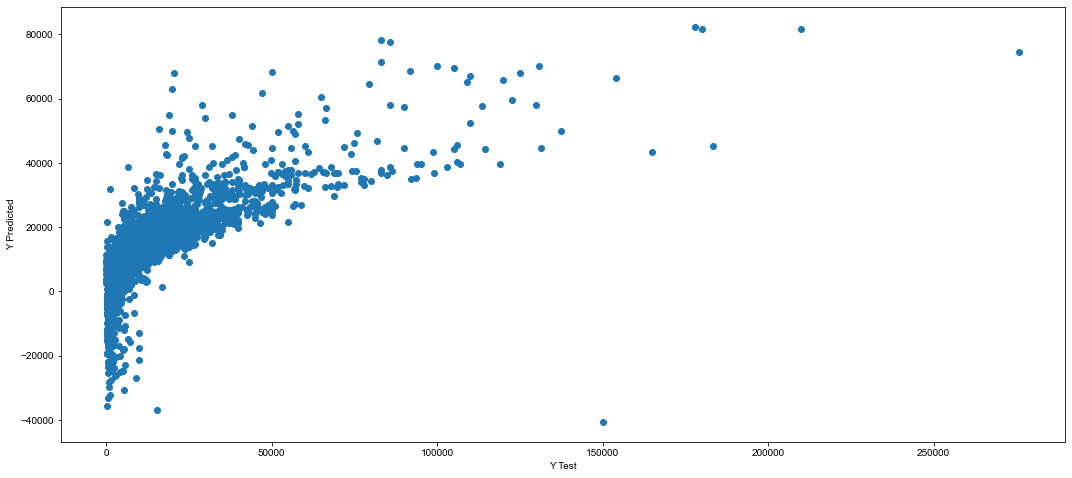

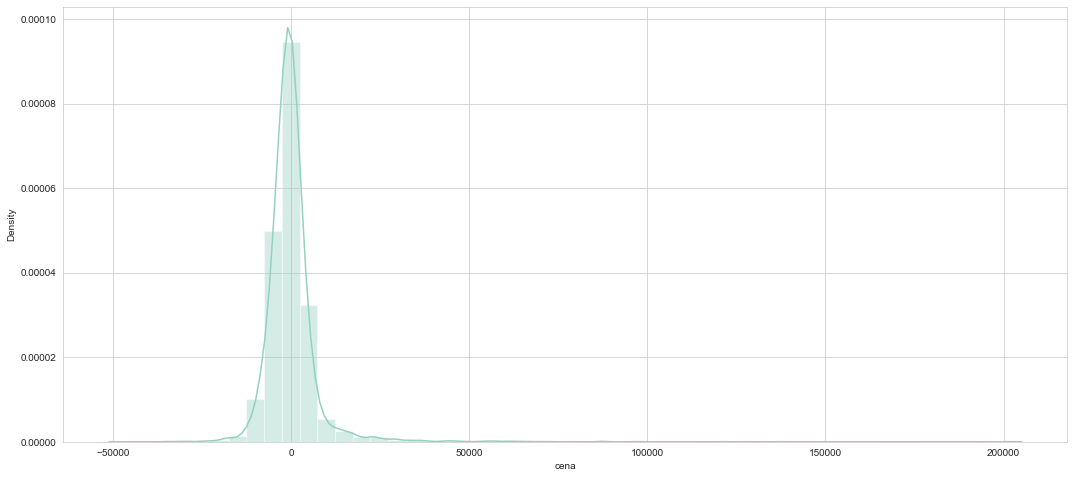

In [13]:
pred = train_and_predict(LinearRegression, xtrain, xtest, ytrain, ytest, output=True)

In [14]:
crosval = cross_val_score(LinearRegression(), df_for_training[:DATA_COUNT], df['cena'][:DATA_COUNT], cv=10)
print(f"Cross validation results: {crosval}")
print(f"Cross validation mean: {crosval.mean()}")

Cross validation results: [0.65023012 0.6267412  0.64069273 0.58259843 0.40389821 0.54834227
 0.52282304 0.49110111 0.51092119 0.45193925]
Cross validation mean: 0.5429287541110192


## Linearna regresija - korišćenjem sopstvene implementacije (može da potraje)

In [15]:
pred = train_and_predict(LinReg, xtrain, xtest, ytrain, ytest, output=True)

AttributeError: 'LinReg' object has no attribute 'fit'

In [ ]:
pred = train_and_predict(LinReg, xtrain, xtest, ytrain, ytest, output=True)